Lembre-se de ativar o T4 GPU.

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=c923bc7f7583a39bcdcc0b8e817aec55b5d2d9071eee1eb1ede133f028fc29f4
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import face_recognition
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

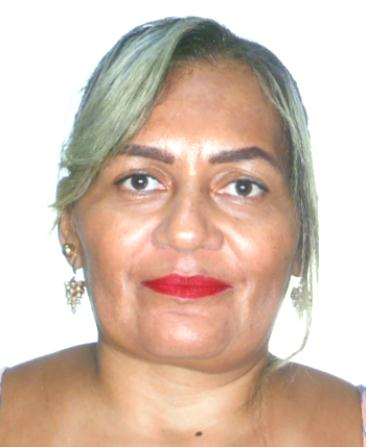

In [ ]:
image = cv2.imread("/content/355603489.JPG")
cv2_imshow(image)

In [ ]:
print(image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [254 254 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [254 254 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [254 254 254]]

 ...

 [[103 144 193]
  [103 144 193]
  [103 144 193]
  ...
  [154 179 223]
  [190 209 247]
  [195 211 248]]

 [[101 142 191]
  [102 143 192]
  [103 144 193]
  ...
  [151 176 220]
  [188 207 245]
  [198 214 251]]

 [[100 141 190]
  [101 142 191]
  [102 143 192]
  ...
  [146 171 213]
  [185 204 242]
  [198 214 251]]]


In [ ]:
image = face_recognition.load_image_file("/content/355603489.JPG")
print(image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [254 254 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [254 254 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [254 254 254]]

 ...

 [[193 144 103]
  [193 144 103]
  [193 144 103]
  ...
  [223 179 154]
  [247 209 190]
  [248 211 195]]

 [[191 142 101]
  [192 143 102]
  [193 144 103]
  ...
  [220 176 151]
  [245 207 188]
  [251 214 198]]

 [[190 141 100]
  [191 142 101]
  [192 143 102]
  ...
  [213 171 146]
  [242 204 185]
  [251 214 198]]]


In [ ]:
#coordanadas do rosto
face_coord = face_recognition.face_locations(image)
print(face_coord)

[(118, 291, 341, 68)]


In [ ]:
face_encoding_list = face_recognition.face_encodings(image, known_face_locations=face_coord)[0]
print(face_encoding_list)

[-0.18950191  0.03930754  0.01839764 -0.04387529 -0.09169662 -0.07411985
  0.00646033 -0.06628405  0.19805926 -0.13674349  0.14614494 -0.01890946
 -0.13317189 -0.00172789 -0.06088156  0.1497488  -0.18462893 -0.18407245
 -0.13415059 -0.0456843   0.00637755  0.00288399  0.06397732  0.07024956
 -0.10960244 -0.30937916 -0.038773   -0.11868624  0.05390539 -0.00999138
 -0.04137722  0.10783221 -0.20731929 -0.07858491  0.03847638  0.09166294
 -0.00478554 -0.06103241  0.22016084 -0.01747135 -0.25050005 -0.01154061
  0.04145493  0.29909399  0.23964143  0.01528713 -0.01323813 -0.10747337
  0.09739657 -0.33979285  0.04097088  0.16627504 -0.00327143  0.04650284
  0.01963387 -0.19417116  0.06582877  0.0870273  -0.20547512  0.0013186
  0.0090642  -0.07383139 -0.01472201 -0.05348025  0.27208638  0.17204627
 -0.14059007 -0.08113223  0.19891578 -0.13761272  0.04688903  0.06328829
 -0.14212579 -0.20718507 -0.26074353 -0.02206671  0.48627374  0.15273815
 -0.11449027  0.08143374 -0.17329289 -0.01210903  0.

In [ ]:
face_landmarks_list = face_recognition.face_landmarks(image)
print(face_landmarks_list)

[{'chin': [(76, 195), (77, 223), (80, 252), (85, 279), (93, 306), (107, 327), (130, 343), (156, 355), (185, 360), (214, 359), (241, 350), (264, 333), (279, 311), (288, 286), (295, 259), (300, 233), (303, 205)], 'left_eyebrow': [(95, 167), (109, 150), (133, 144), (155, 148), (177, 158)], 'right_eyebrow': [(207, 160), (228, 151), (250, 147), (273, 155), (287, 172)], 'nose_bridge': [(190, 181), (189, 199), (187, 217), (186, 235)], 'nose_tip': [(165, 248), (175, 252), (187, 255), (198, 253), (210, 251)], 'left_eye': [(120, 185), (133, 176), (149, 177), (162, 189), (148, 191), (132, 191)], 'right_eye': [(220, 193), (234, 181), (250, 182), (262, 192), (250, 197), (235, 196)], 'top_lip': [(142, 283), (159, 278), (176, 275), (187, 278), (198, 275), (215, 280), (232, 287), (224, 287), (199, 288), (186, 288), (175, 287), (150, 285)], 'bottom_lip': [(232, 287), (215, 296), (199, 299), (186, 300), (174, 298), (158, 294), (142, 283), (150, 285), (175, 285), (187, 286), (199, 285), (224, 287)]}]


In [ ]:
female_faceencoding = []
female_filenames = []
male_faceencoding = []
male_filenames = []

In [ ]:
for file in os.listdir("/content/drive/MyDrive/Face_Female"):
  image = face_recognition.load_image_file("/content/drive/MyDrive/Face_Female/" + file)
  face_coord = face_recognition.face_locations(image)
  face_encoding_list = face_recognition.face_encodings(image, known_face_locations=face_coord)[0]
  female_filenames.append(file)
  female_faceencoding.append(face_encoding_list)



In [ ]:
print(female_filenames)
print(female_faceencoding)

['357055861.JPG', '356134873.JPG', '358031745.JPG', '358662257.JPG', '355808773.JPG', '357305256.JPG', '358085896.JPG', '357667530.JPG', '358369126.JPG', '358524032.JPG', '358689759.JPG', '357747291.JPG', '356798704.JPG', '358565928.JPG', '358243386.JPG', '357941349.JPG', '355923106.JPG', '358340411.JPG', '356624188.JPG', '358459079.JPG', '358195144.JPG', '357388984.JPG', '358312230.JPG', '357454812.JPG', '357715390.JPG', '357252977.JPG', '357066820.JPG', '358369339.JPG', '357406885.JPG', '357353900.JPG', '358012872.JPG', '358457386.JPG', '357048008.JPG', '357280270.JPG', '357418050.JPG', '357942795.JPG', '358628644.JPG', '358502381.JPG', '358199301.JPG', '358124182.JPG', '357299353.JPG', '357986962.JPG', '357929101.JPG', '358526949.JPG', '356997316.JPG', '357341996.JPG', '358507278.JPG', '357263626.JPG', '358077907.JPG', '358786703.JPG', '358159130.JPG', '357089189.JPG', '357428200.JPG', '358084954.JPG', '357280040.JPG', '358312329.JPG', '356127958.JPG', '358050448.JPG', '357820304.JP

In [ ]:
for file in os.listdir("/content/drive/MyDrive/Face_Male"):
  image = face_recognition.load_image_file("/content/drive/MyDrive/Face_Male/" + file)
  face_coord = face_recognition.face_locations(image)
  face_encoding_list = face_recognition.face_encodings(image, known_face_locations=face_coord)[0]
  male_filenames.append(file)
  male_faceencoding.append(face_encoding_list)

In [ ]:
df_female = pd.DataFrame(female_faceencoding)
df_female.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.103605,0.098553,0.048449,-0.023536,-0.088837,-0.004980,-0.070175,-0.103303,0.196813,-0.249934,...,0.124308,0.018300,0.043626,-0.060235,-0.139102,-0.159621,0.071468,-0.095178,0.060625,-0.046293
1,-0.090670,0.051509,0.055638,-0.099995,-0.103956,-0.056465,-0.095990,-0.141550,0.246297,-0.145457,...,0.048956,0.047447,0.016407,-0.053966,-0.234732,-0.018560,0.082389,-0.056213,0.069711,0.020735
2,-0.172497,0.095313,0.035305,-0.067589,-0.152849,-0.019065,-0.057216,-0.066615,0.207755,-0.169969,...,0.132555,-0.012994,0.060796,-0.092611,-0.115276,-0.188345,0.062062,-0.050988,0.090245,0.014909
3,-0.037385,0.088957,-0.010694,-0.065470,-0.024096,0.053958,-0.041142,-0.174095,0.181884,-0.071781,...,0.048875,0.039705,0.030291,-0.066332,-0.127411,-0.129347,0.047807,-0.071301,0.032264,0.003098
4,-0.067757,0.111891,0.005989,-0.062529,-0.119561,-0.043829,-0.087701,-0.132338,0.215819,-0.075998,...,0.090713,0.031622,-0.023219,-0.067364,-0.190794,-0.018665,0.096683,-0.117899,0.015974,0.060023


In [ ]:
df_female["genero"] = "f"
df_female["file_names"] = female_filenames

In [ ]:
df_female.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,genero,file_names
0,-0.103605,0.098553,0.048449,-0.023536,-0.088837,-0.004980,-0.070175,-0.103303,0.196813,-0.249934,...,0.043626,-0.060235,-0.139102,-0.159621,0.071468,-0.095178,0.060625,-0.046293,f,357055861.JPG
1,-0.090670,0.051509,0.055638,-0.099995,-0.103956,-0.056465,-0.095990,-0.141550,0.246297,-0.145457,...,0.016407,-0.053966,-0.234732,-0.018560,0.082389,-0.056213,0.069711,0.020735,f,356134873.JPG
2,-0.172497,0.095313,0.035305,-0.067589,-0.152849,-0.019065,-0.057216,-0.066615,0.207755,-0.169969,...,0.060796,-0.092611,-0.115276,-0.188345,0.062062,-0.050988,0.090245,0.014909,f,358031745.JPG
3,-0.037385,0.088957,-0.010694,-0.065470,-0.024096,0.053958,-0.041142,-0.174095,0.181884,-0.071781,...,0.030291,-0.066332,-0.127411,-0.129347,0.047807,-0.071301,0.032264,0.003098,f,358662257.JPG
4,-0.067757,0.111891,0.005989,-0.062529,-0.119561,-0.043829,-0.087701,-0.132338,0.215819,-0.075998,...,-0.023219,-0.067364,-0.190794,-0.018665,0.096683,-0.117899,0.015974,0.060023,f,355808773.JPG


In [ ]:
df_male = pd.DataFrame(male_faceencoding)
df_male["genero"] = "m"
df_male["file_names"] = male_filenames
df_male.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,genero,file_names
0,-0.049036,0.040639,-0.009095,0.003375,-0.099816,0.016390,0.027835,-0.106768,0.125381,-0.121448,...,0.003814,-0.077047,-0.229952,-0.077524,0.048410,-0.011395,0.014382,0.019525,m,358005302.JPG
1,-0.111358,0.139062,0.082599,0.020185,0.012588,0.015902,0.013631,-0.043897,0.256005,-0.026911,...,0.072566,0.014079,-0.135640,-0.058085,0.104508,-0.043359,0.087119,0.059926,m,357999819.JPG
2,-0.115335,0.116346,0.108838,-0.050123,-0.062447,-0.060766,-0.013740,-0.070012,0.140198,-0.073300,...,0.007801,-0.186602,-0.109600,-0.052420,0.045651,0.025382,-0.022258,-0.009270,m,358077591.JPG
3,-0.151543,0.022285,-0.003658,-0.058624,0.009923,-0.035533,-0.045339,-0.058425,0.193529,-0.159472,...,0.020080,-0.061055,-0.130195,-0.116402,0.058930,0.005245,0.056676,-0.075304,m,358322251.JPG
4,-0.176354,0.130231,0.043696,-0.101460,-0.009795,-0.086171,-0.043305,-0.006290,0.164159,-0.074930,...,0.085621,-0.079813,-0.080652,-0.047633,0.051668,0.007392,0.070708,0.040698,m,358454905.JPG


In [ ]:
df = pd.concat([df_male, df_female]).reset_index(drop=True)
df.genero.value_counts()

genero
m    249
f    235
Name: count, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['genero', 'file_names'], axis=1), df['genero'], test_size=0.3)

In [ ]:
model = SVC()

In [ ]:
train_model = model.fit(X_train, y_train)

In [ ]:
results = train_model.predict(df.drop(["genero", "file_names"], axis=1))

In [ ]:
print(results)

['m' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm'
 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm'
 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm'
 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm'
 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm'
 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm'
 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm'
 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'f'
 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm'
 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm'
 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm'
 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm'
 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm'
 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm

In [ ]:
df["results"] = results

In [ ]:
confusion_matrix(df["results"], df["genero"])

array([[232,   1],
       [  3, 248]])

In [ ]:
df[df["genero"] != df["results"]]

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,genero,file_names,results
143,-0.096218,0.021234,0.126078,-0.027085,-0.036696,-0.095178,-0.004476,-0.140099,0.217942,-0.165232,...,-0.037296,-0.157168,-0.126461,0.056199,0.006184,0.056223,-0.003192,m,357150546.JPG,f
271,-0.094612,0.178490,0.025915,-0.055004,-0.090690,0.068785,-0.059934,-0.112720,0.276301,-0.135629,...,-0.077561,-0.152451,-0.060510,0.044838,-0.050888,0.053303,0.054408,f,358312230.JPG,m
274,-0.152772,0.083795,-0.008722,-0.049317,-0.063915,-0.129756,0.097346,-0.191453,0.146091,-0.087946,...,-0.075829,-0.096596,-0.079245,0.046539,-0.034601,-0.002145,-0.029636,f,357252977.JPG,m
388,-0.078929,0.098937,0.019441,0.005463,-0.057643,0.115086,0.039319,-0.055907,0.265351,-0.216560,...,-0.018674,-0.278919,-0.049278,0.078996,0.074745,0.014602,0.040336,f,356433927.JPG,m
